<a href="https://colab.research.google.com/github/viviakemik/machine-learning/blob/main/trees/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Book: 

* Hands-on Machine Learning with Scikit-learn & TensorFlow

https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646

2. Github: https://github.com/ageron/handson-ml2

3. Courses: 
* https://www.coursera.org/learn/ml-classification/home
* https://learning.edx.org/course/course-v1:UCSanDiegoX+DSE220x+1T2021/home

4. Youtube:
* https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

* Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform **both classification and regression tasks**, and even **multioutput** tasks.

* One of the many qualities of Decision Trees is that they require **very little data preparation.** In particular, they **don’t require feature
scaling or centering** at all.

* A Decision Tree can operate on **both categorical and numerical data**.

Source: https://www.youtube.com/watch?v=7VeUPuFGJHk

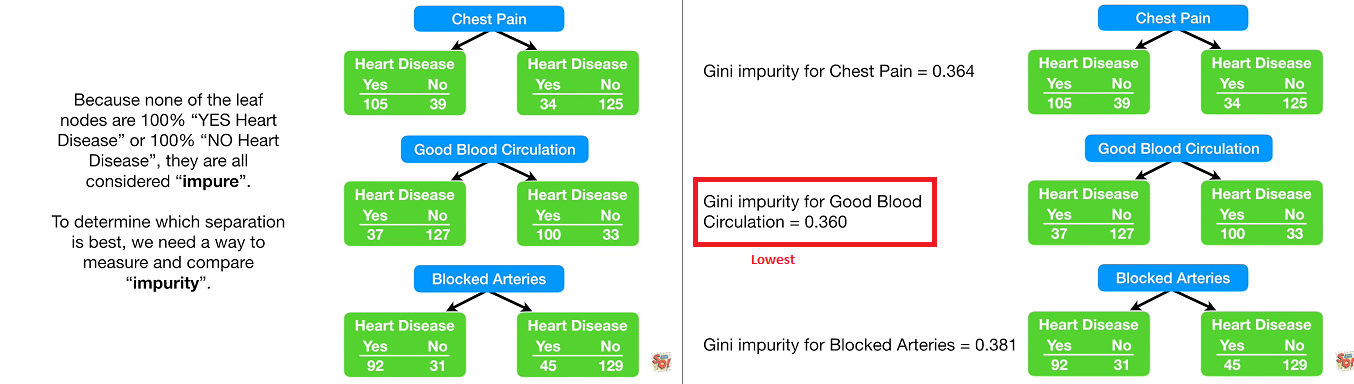

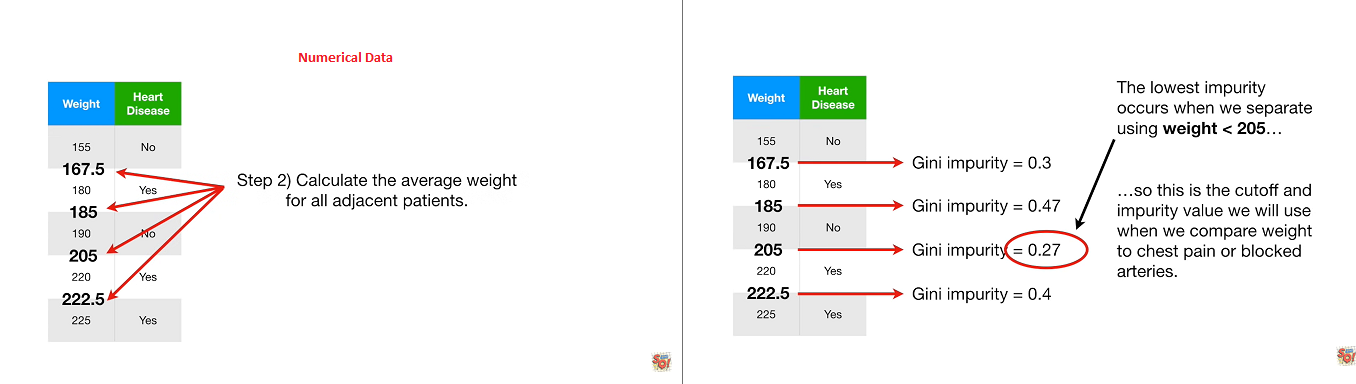

Multiple Choice Data

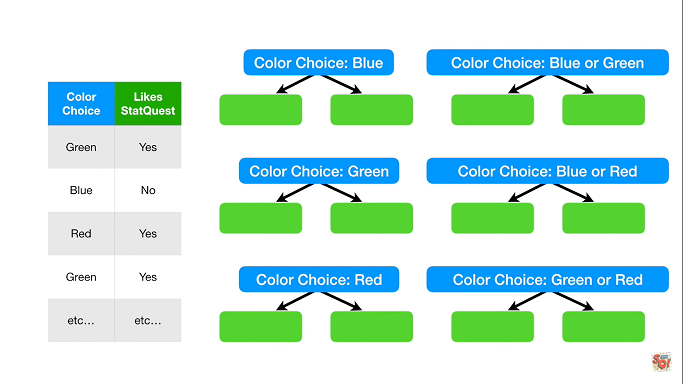



**To visualize tree (you can use):**

from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)

clf.fit(x_train,y_train)

plt.figure(figsize=(20,20))

features = df.columns

classes = ['Not heart disease','heart disease']

tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)

plt.show()

# **Training and visualizing a Decision Tree**

* Scikit-Learn uses the CART algorithm (Uses Gini Index as attribute selection measure), which produces **only binary
trees**. 

* However, other algorithms such as ID3 (Uses Information Gain as attribute selection measure) can produce Decision Trees with nodes that have more than two children.

* It stops recursing once it **reaches the maximum depth** (defined by the max_depth hyperparameter), **or** if it cannot find a split that **will reduce impurity**.

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

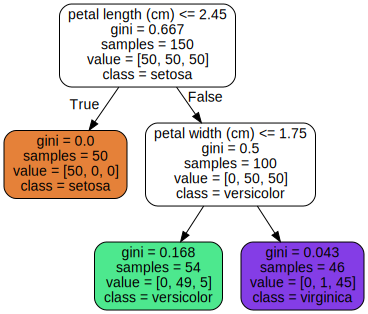

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

# **Making Predictions**

A node’s value attribute tells you how **many training instances** of each class this node applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 Iris-Versicolor, and 45 Iris-Virginica.

a node’s **gini attribute measures its impurity**: a node is “pure” (gini=0)


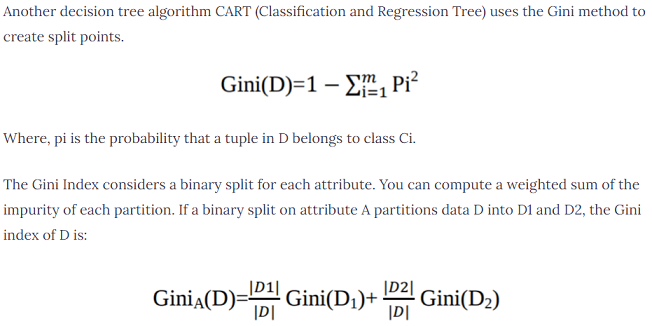

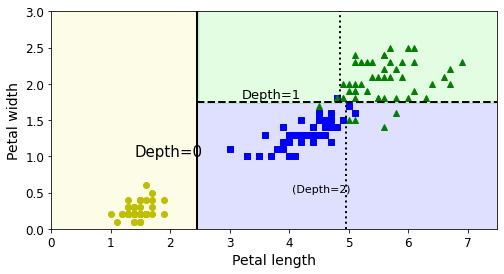

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

#save_fig("decision_tree_decision_boundaries_plot")
plt.show()

* The thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm.

* the right area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line).

* Since max_depth was set to 2, the Decision Tree
stops right there. However, if you set max_depth to 3, then the two depth-2 nodes
would each add another decision boundary (represented by the dotted lines).

# **Estimating Class Probabilities**

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54),
and 9.3% for Iris-Virginica (5/54).

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

should output Iris-Versicolor (class 1) since it has the highest probability.

# **The CART Training Algorithm**

## **Greedy Algorithm**

it is not
guaranteed to be the optimal solution.

Source: https://www.coursera.org/learn/ml-classification/home

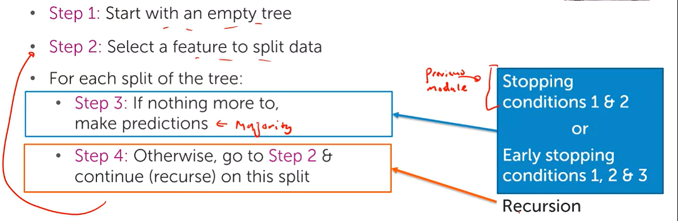

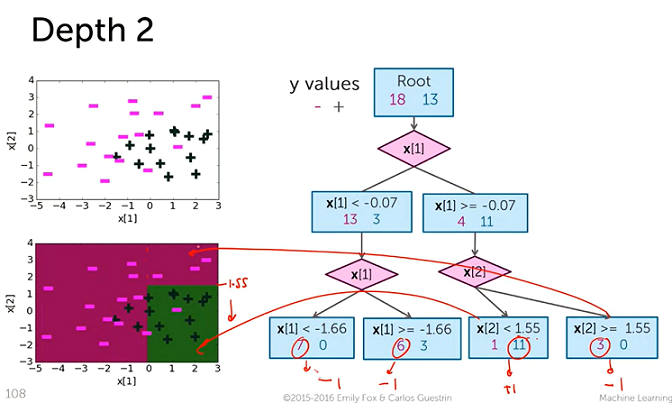

## **Computational Complexity**

Decision Tree requires going through roughly O(log2(m)) nodes.
However, the training algorithm compares all features (or less if max_features is set)
on all samples at each node. This results in a training complexity of O(n × m log(m)).
For small training sets (less than a few thousand instances), Scikit-Learn can speed up
training by presorting the data (set presort=True), but this slows down training considerably for larger training sets.

## **Gini Impurity or Entropy?**

* The truth is, most of the time it does not
make a big difference: they lead to similar trees. 

* Gini impurity is slightly faster to
compute, so it is a good default.

* **Gini** impurity tends to **isolate the most frequent class** in its own branch of the tree, while **entropy** tends to produce slightly **more balanced trees**.

You can set this using *criterion* hyperparameter

# **Regularization Hyperparameters**


The DecisionTreeClassifier class has a few other parameters that similarly restrict
the shape of the Decision Tree:

* **min_samples_split** (the minimum number of samples a node must have before it can be split)
* **min_samples_leaf** (the minimum number of samples a leaf node must have), 
* **min_weight_fraction_leaf** (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
* **max_leaf_nodes** (maximum number of leaf nodes)
* **max_features** (maximum number of features that are evaluated for splitting at each node). 

Increasing min_* hyperparameters or reducing max_* hyperparameters **will regularize the model**.

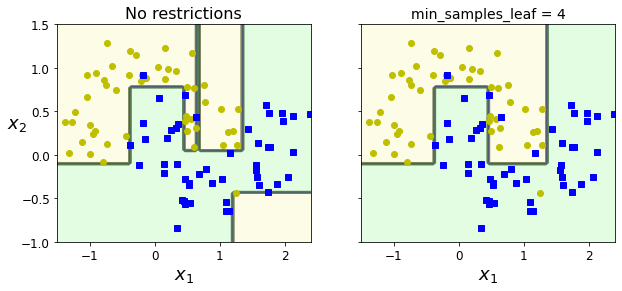

In [7]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

#save_fig("min_samples_leaf_plot")
plt.show()

It is quite obvious that the model on the left is **overfitting**, and the
model on the right will probably generalize better.

## **When stopping**

Use **cross validation** to determine max depth

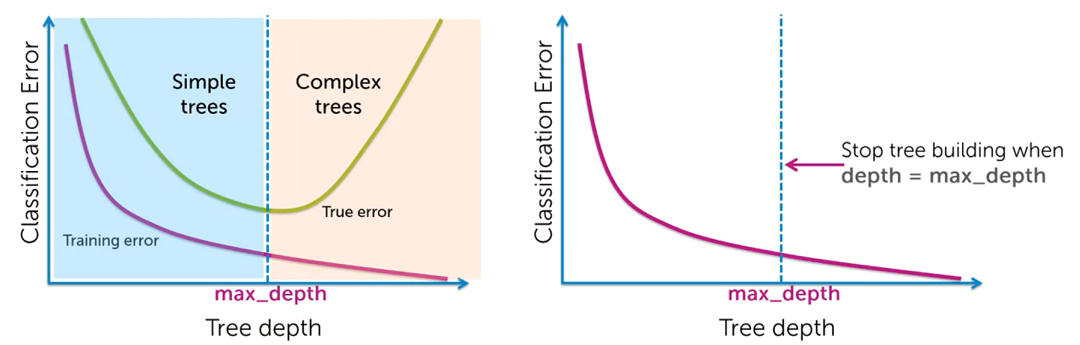

or 

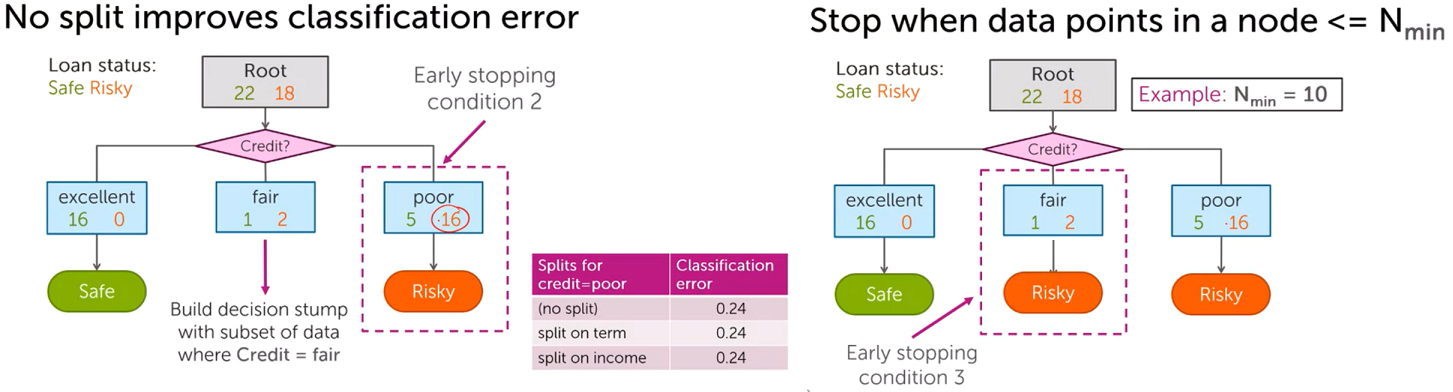

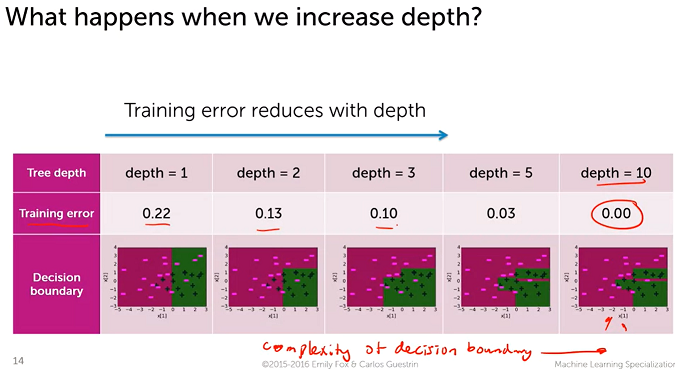

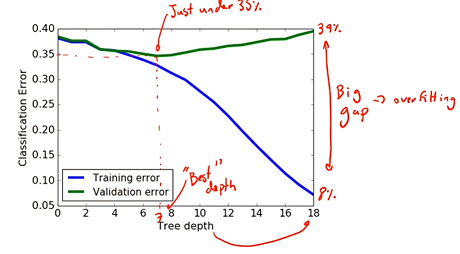

# **Regression**


https://www.youtube.com/watch?v=g9c66TUylZ4&t=535s


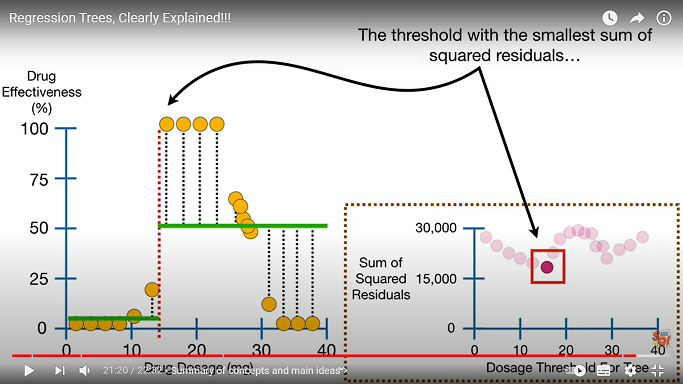

In [8]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

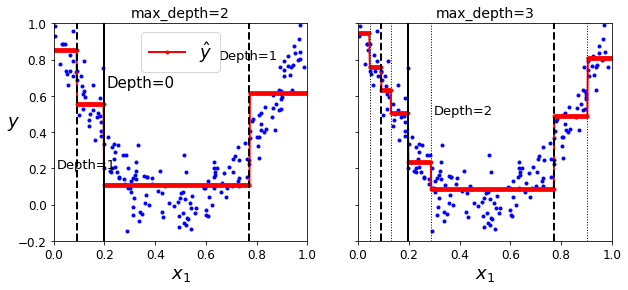

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

#save_fig("tree_regression_plot")
plt.show()

Notice how the predicted value for each region is always the average target value of the instances in that
region. The algorithm splits each region in a way that makes most training instances
as close as possible to that predicted value.

In [11]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

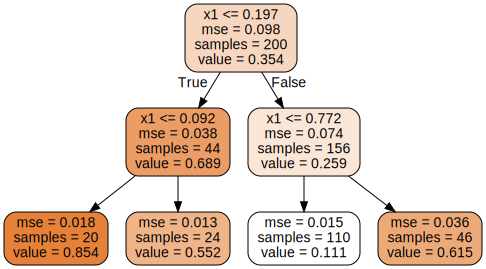

In [12]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

This tree looks very similar to the classification tree you built earlier. The main difference is that instead of predicting a class in each node, **it predicts a value**.

For example,
suppose you want to make a prediction for a new instance with x1 = 0.6. You **traverse the tree starting at the root**, and you eventually reach the leaf node that predicts
value=0.1106.

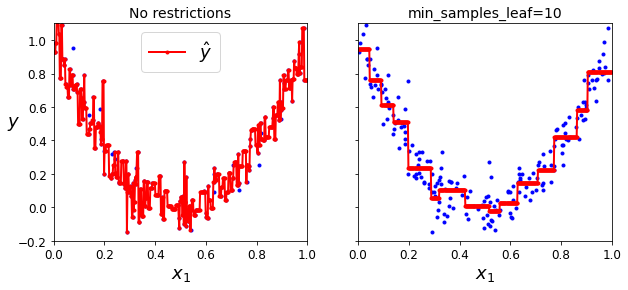

In [13]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

#save_fig("tree_regression_regularization_plot")
plt.show()

**Without any regularization** (i.e., using the default hyperparameters), you get the predictions on the left. It is obviously **overfitting** the training set very badly. Just setting min_samples_leaf=10 results in a much more reasonable model, represented on the right

# **Instability**

Decision Trees love **orthogonal decision boundaries** (all splits are perpendicular to an axis),

More generally, the main issue with Decision Trees is that they are very **sensitive to small variations in the training data**.

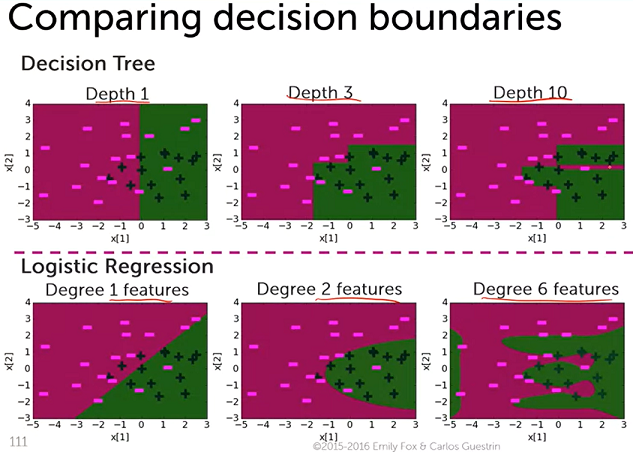

In [14]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

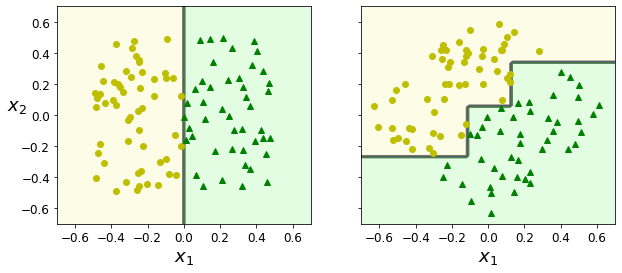

In [15]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

#save_fig("sensitivity_to_rotation_plot")
plt.show()

on the left, a Decision Tree can split it easily, while on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily convoluted. Although both Decision Trees fit the training set perfectly, it is very likely that the model on the right will not generalize well. One way to limit this problem is to use PCA

We've seen that small changes in the dataset (such as a rotation) may produce a very different Decision Tree. 

Now let's show that training the same model on the same data may produce a very different model every time, since the CART training algorithm used by Scikit-Learn is stochastic. To show this, we will set random_state to a different value than earlier:

In [16]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

For example, if you just remove the widest Iris-Versicolor from the iris training set

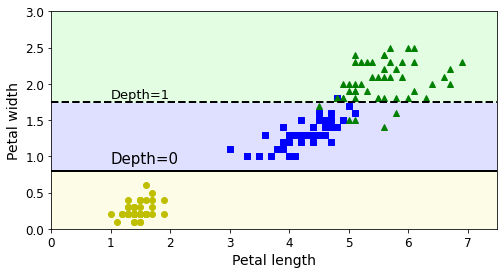

In [17]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

#save_fig("decision_tree_instability_plot")
plt.show()

Actually, since the training algorithm used by Scikit-Learn is stochastic6 you **may get very different models even on the same training data** (unless you set the **random_state** hyperparameter).

# **Exercise**

## **1.** 
What is the approximate depth of a Decision Tree trained (without restrictions)
on a training set with 1 million instances?

log2(m) depth => log2(10^6) = 20 (balanced tree)




## **2.**

Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?

Lower

## **5.**

If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?

computational complexity of training a Decision Tree is given by O(n × m log(m)). So, when we multiplied the size of the training set by 10, then the training time will be multiplied by some factor, say K.

Now, we have to determine the value of K. To find K, divide the complexity of both:

K = (n × 10m × log(10m)) / (n × m × log(m)) = 10 × log(10m) / log(m)

For 10 million instances i.e., m = 106, then we get the value of K ≈ 11.7.

Therefore, we can expect the training time to be roughly 11.7 hours.

## **6.**

If your training set contains 100,000 instances, will setting presort=True speed
up training?

Whether to presort the data to speed up the finding of best splits in fitting. For the default settings of a decision tree on large datasets, setting this to true may slow down the training process. When using either a smaller dataset or a restricted depth, this may speed up the training.

## **7.**

Train and fine-tune a Decision Tree for the moons dataset.
a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).


In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. Split it into a training set and a test set using train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    9.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

d. Train it on the full training set using these hyperparameters, and measure
your model’s performance on the test set. You should get roughly 85% to 87%
accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

## **8.**

Grow a forest.

a. Continuing the previous exercise, generate 1,000 subsets of the training set,
each containing 100 instances selected randomly. Hint: you can use Scikit-
Learn’s ShuffleSplit class for this.

In [ ]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [ ]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054499999999999

c. Now comes the magic. For each test set instance, generate the predictions of
the 1,000 Decision Trees, and keep only the most frequent prediction (you can
use SciPy’s mode() function for this). This gives you majority-vote predictions
over the test set.

In [ ]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [ ]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [ ]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872

# **Extras**

ID3 uses Entropy and Information Gain as attribute selection measures to construct a Decision Tree.

* Entropy:  A Decision Tree is built top-down from a root node and involves the partitioning of data into homogeneous subsets.  Therefore, entropy is zero when the sample is completely homogeneous, and entropy of one when the sample is equally divided between different classes.

* Information Gain:  Information Gain is based on the decrease in entropy after splitting a dataset based on an attribute. The meaning of constructing a Decision Tree is all about finding the attributes having the highest information gain. Higher the difference implies the lower entropy of all data segments resulting from the split (the higher the information gain)

can produce Decision Trees with nodes having more than two children

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

* Gini impurity is a good default while implementing in sklearn since it is slightly faster to compute.
*  entropy tends to produce slightly more balanced Trees

Decision Trees are suitable for the following cases:

1. Decision Trees are most suitable for tabular data.

2. The outputs are discrete.

3. Explanations for Decisions are required.

4. The training data may contain errors, noisy data(outliers).

5. The training data may contain missing feature values.

Scikit learn not handle missing value automatically

You can modify your own algorithm to include missing data (use error to include unknown values)

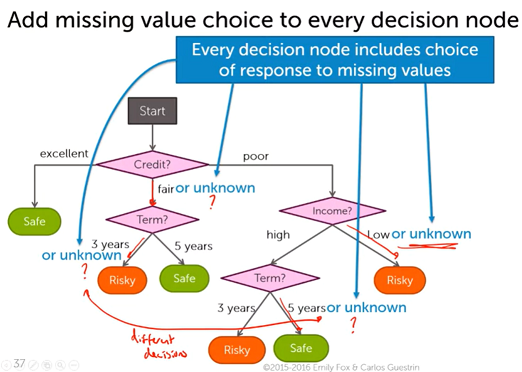

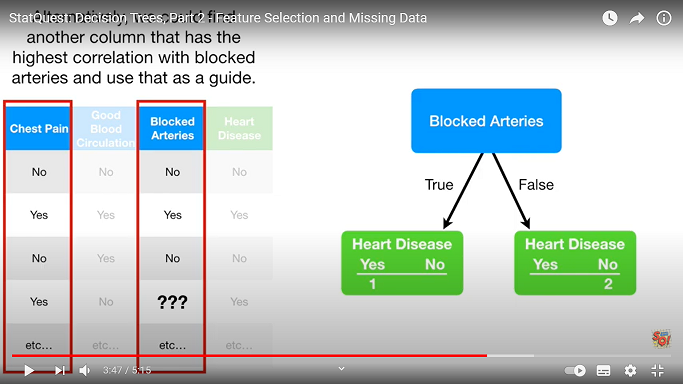

Decision Trees handle continuous features by converting these continuous features to a threshold-based boolean feature.

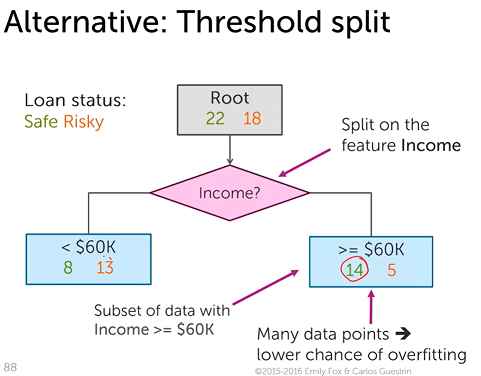

Decision Trees are not sensitive to noisy data or outliers since, extreme values or outliers, never cause much reduction in Residual Sum of Squares(RSS), because they are never involved in the split.

When we remove sub-nodes of a Decision node, this process is called pruning or the opposite process of splitting. The two techniques which are widely used for pruning are- Post and Pre Pruning.

**Post Pruning:**

* This type of pruning is used after the construction of the Decision Tree.
* This technique is used when the Decision Tree will have a very large depth and will show the overfitting of the model.
* It is also known as backward pruning.
* This technique is used when we have an infinitely grown Decision Tree.

**Pre Pruning:**
* This technique is used before the construction of the Decision Tree.
* Pre-Pruning can be done using Hyperparameter tuning.
* Overcome the overfitting issue.

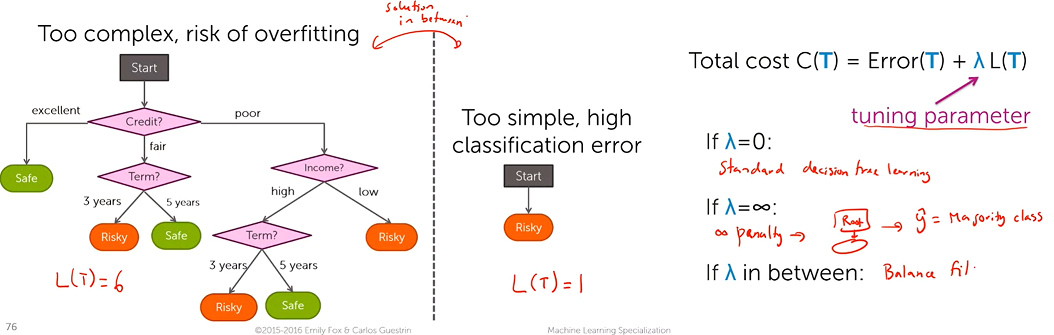

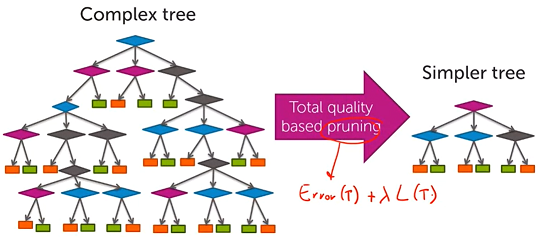

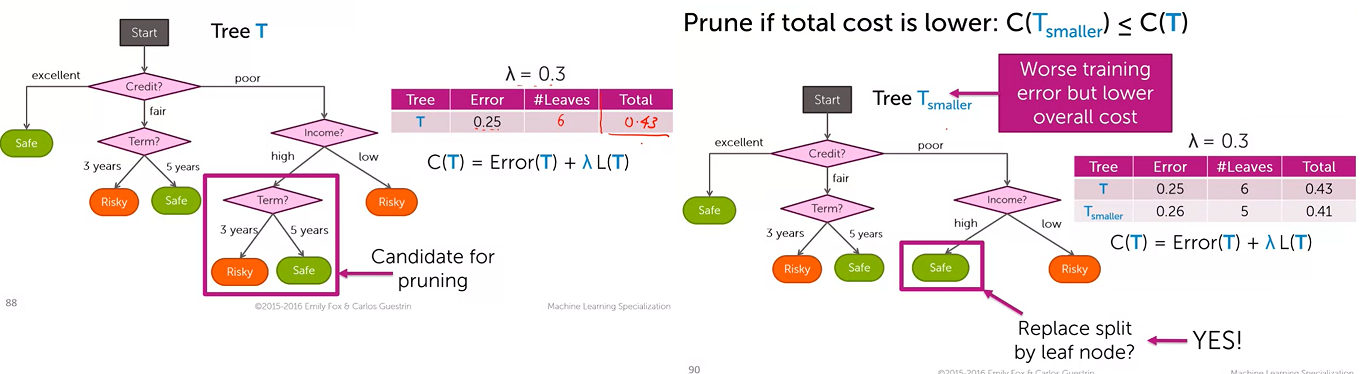

https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial

## **1. Pre pruning techniques**

params = {'max_depth': [2,4,6,8,10,12],

         'min_samples_split': [2,3,4],
         
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()

gcv = GridSearchCV(estimator=clf,param_grid=params)

gcv.fit(x_train,y_train)

## **2. Post pruning techniques**

**Cost Complexity Pruning**

We can limit parameters like max_depth , min_samples etc. But a most effective way is to use post pruning methods like cost complexity pruning. This helps to improve test accuracy and get a better model.

path = clf.cost_complexity_pruning_path(x_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

For each alpha we will append our model to a list

clfs = []

for ccp_alpha in ccp_alphas:

    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)

    clf.fit(x_train, y_train)

    clfs.append(clf)

https://www.youtube.com/watch?v=D0efHEJsfHo&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=42

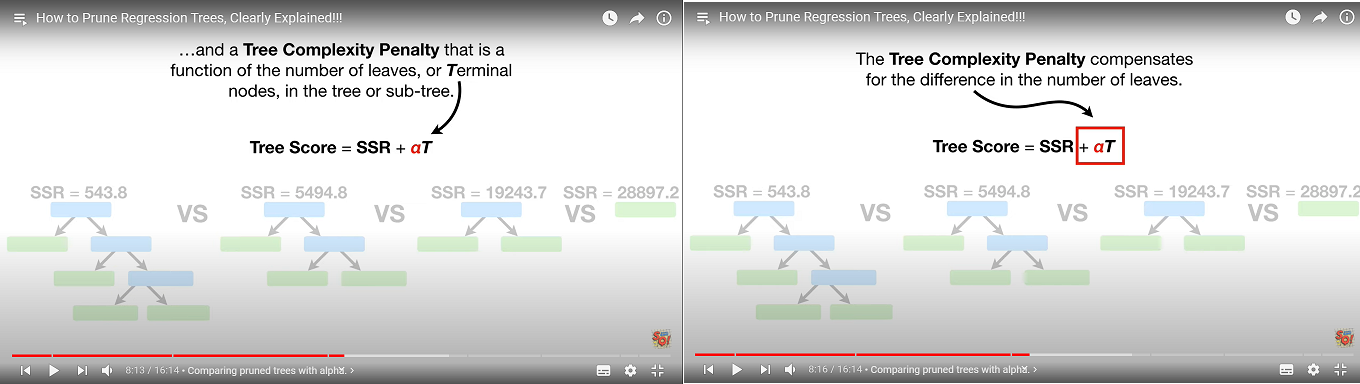

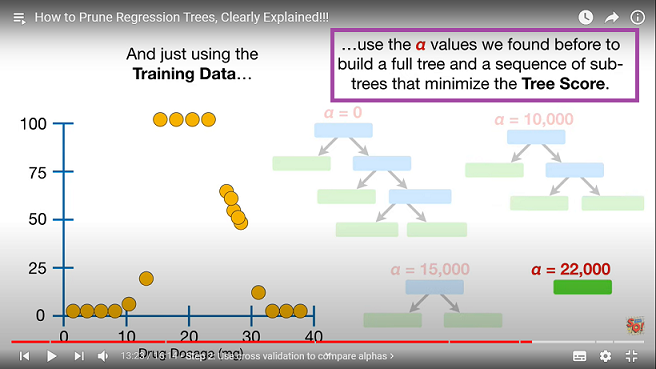

https://vzhang1999.medium.com/classification-tree-growing-and-pruning-with-python-code-grid-search-cost-complexity-function-b2e45e33a1a4

prune the tree with cost complexity pruning — Alpha

path = fulltree.cost_complexity_pruning_path(train_x, train_y)

alphas, impurities = path.ccp_alphas, path.impurities

mean, std = [], []

for i in alphas:

 tree = DecisionTreeClassifier(ccp_alpha=i, random_state=0)


 **5 fold cross validation for each alpha value**

 scores = cross_val_score(tree, x, y, cv=5)

 mean.append(scores.mean())

 std.append(scores.std())

keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies

eva_df = pd.DataFrame({‘alpha’: alphas, ‘mean’: mean, ‘std’: std})

eva_df = eva_df.sort_values([‘mean’], ascending = False)

eva_df.head(10)

**Advantages**

1. Clear Visualization

2. Simple and easy to understand

3. This can be used for both classification and regression problems.

4. Decision Trees can handle both continuous and categorical variables.

5. No feature scaling required: Decision Tree as it uses a rule-based approach instead of calculation of distances.

6. Handles nonlinear parameters efficiently: So, if there is high non-linearity present between the independent variables, Decision Trees may outperform as compared to other curve-based algorithms.

7. Decision Tree can automatically handle missing values.

8. Decision Tree handles the outliers automatically, hence they are usually robust to outliers.

9. Less Training Period: The training period of decision trees is less as compared to ensemble techniques like Random Forest because it generates only one Tree unlike the forest of trees in the Random Forest.

**disadvantages**

1. Overfitting

2. Unstable: When we add new data points it can lead to regeneration of the overall Tree. Therefore, all nodes need to be recalculated and reconstructed.

3. Not suitable for large datasets

## **Selection Feature**

https://machinelearningmastery.com/calculate-feature-importance-with-python/


We can use the CART algorithm for feature importance implemented in scikit-learn

model = DecisionTreeRegressor()

model.fit(X, y)

importance = model.feature_importances_